58889256/58889256 [==============================] - 1s 0us/step


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 256)               131328    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 14848586 (56.64 MB)
Trainable params: 133898 (523.04 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________
Epoch 1/1

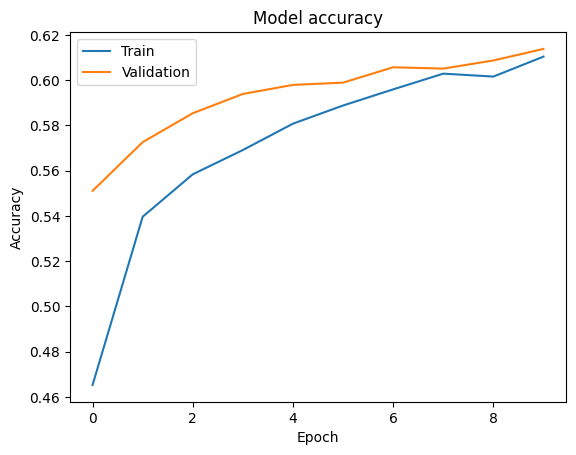

Epoch 1/5
1563/1563 [==============================] - 30s 16ms/step - loss: 1.9108 - accuracy: 0.2520 - val_loss: 1.6089 - val_accuracy: 0.3950
Epoch 2/5
1563/1563 [==============================] - 23s 15ms/step - loss: 1.4777 - accuracy: 0.4543 - val_loss: 1.3503 - val_accuracy: 0.5127
Epoch 3/5
1563/1563 [==============================] - 23s 15ms/step - loss: 1.3024 - accuracy: 0.5343 - val_loss: 1.2513 - val_accuracy: 0.5589
Epoch 4/5
1563/1563 [==============================] - 23s 15ms/step - loss: 1.1952 - accuracy: 0.5795 - val_loss: 1.1684 - val_accuracy: 0.5917
Epoch 5/5
1563/1563 [==============================] - 23s 15ms/step - loss: 1.1174 - accuracy: 0.6090 - val_loss: 1.1698 - val_accuracy: 0.5963
Time taken to train AlexNet-like model: 124.77442646026611
313/313 [==============================] - 1s 4ms/step - loss: 1.1698 - accuracy: 0.5963
AlexNet-like Model - Loss: 1.1697746515274048
AlexNet-like Model - Accuracy: 0.5963000059127808


In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize the pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert class vectors to binary class matrices (for use with categorical_crossentropy)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Split training data into train and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Load VGG16 model pre-trained on ImageNet
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the layers
for layer in vgg_base.layers:
    layer.trainable = False

# Create the model
model = models.Sequential([
    vgg_base,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer=Adam(lr=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Train the model
history = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_val, y_val))

# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()





#Alexnet

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import numpy as np
import time

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Preprocess the data
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Define AlexNet-like architecture
alexnet_model = Sequential([
    Conv2D(96, (3, 3), strides=(2, 2), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(256, (5, 5), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    Conv2D(384, (3, 3), padding='same', activation='relu'),
    Conv2D(384, (3, 3), padding='same', activation='relu'),
    Conv2D(256, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
alexnet_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
start_time = time.time()
alexnet_model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_test, y_test))
end_time = time.time()
print("Time taken to train AlexNet-like model:", end_time - start_time)

# Evaluate the model
alexnet_loss, alexnet_accuracy = alexnet_model.evaluate(x_test, y_test)
print("AlexNet-like Model - Loss:", alexnet_loss)
print("AlexNet-like Model - Accuracy:", alexnet_accuracy)